Dataset Overview:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Dataset Shape: (506, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     5

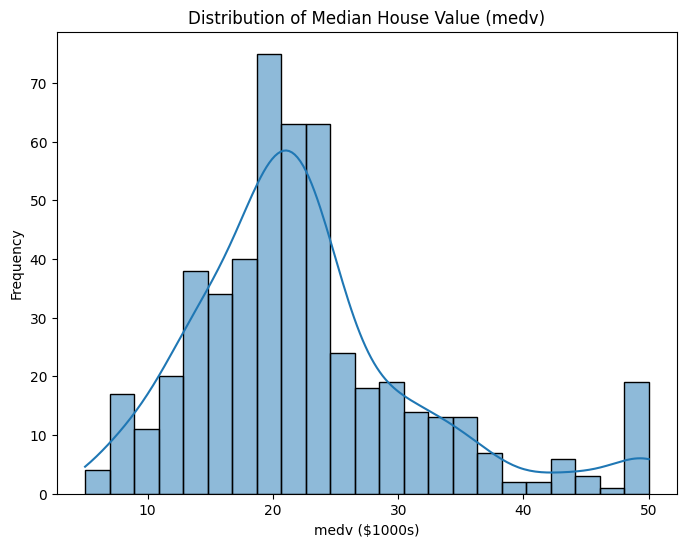

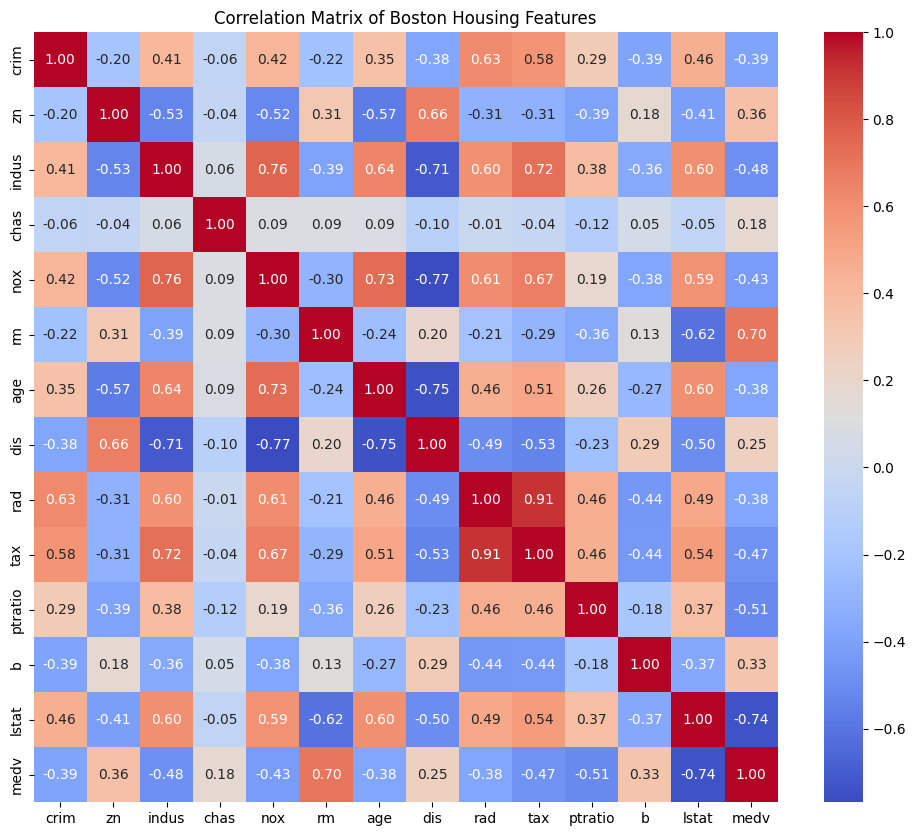

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Load the dataset
# Assuming BostonHousing.csv is in the 'data' folder relative to where the notebook is run
# IMPORTANT: Ensure your CSV file is named 'BostonHousing.csv' with a capital 'B'
# If your CSV is named 'boston_housing.csv' (lowercase 'b'), change the line below accordingly.
df = pd.read_csv('../data/BostonHousing.csv')

# --- Step 2: Data Analysis and Preprocessing ---
print("Dataset Overview:")
print(df.head())
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())

# IMPORTANT: Verify the actual column names in your CSV.
# If 'MEDV' (uppercase) is not found, use the correct column name here (e.g., 'medv', 'PRICE').
# Based on common issues, we're assuming 'medv' (lowercase) is the correct target column name.
print("\nColumns in the loaded DataFrame:", df.columns.tolist())

print("\nMissing Values Before Handling:")
print(df.isnull().sum())
# For Boston Housing, missing values are rare in standard versions.
# If you find any, common strategies include:
# df.fillna(df.mean(), inplace=True) # Fill with mean for numerical columns
# df.dropna(inplace=True) # Drop rows with any missing values

# Visualizations
plt.figure(figsize=(8, 6))
# Changed 'MEDV' to 'medv' based on common dataset variations and error
sns.histplot(df['medv'], kde=True)
plt.title('Distribution of Median House Value (medv)')
plt.xlabel('medv ($1000s)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Boston Housing Features')
plt.show()

# Define features (X) and target (y)
# Changed 'MEDV' to 'medv'
X = df.drop('medv', axis=1) # Features
y = df['medv']              # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 3: Model Training ---

# Model 1: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Model 2: Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Cross-validation for model evaluation
print("\n--- Cross-Validation Results (Negative MSE) ---")
lin_reg_cv_scores = -cross_val_score(lin_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression CV MSE: {lin_reg_cv_scores.mean():.2f} +/- {lin_reg_cv_scores.std():.2f}")

rf_reg_cv_scores = -cross_val_score(rf_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest Regressor CV MSE: {rf_reg_cv_scores.mean():.2f} +/- {rf_reg_cv_scores.std():.2f}")

# Compare model performance on the test set
y_pred_lin_reg = lin_reg.predict(X_test_scaled)
y_pred_rf_reg = rf_reg.predict(X_test_scaled)

mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

print("\n--- Test Set Performance ---")
print(f"Linear Regression - MSE: {mse_lin_reg:.2f}, R2: {r2_lin_reg:.2f}")
print(f"Random Forest Regressor - MSE: {mse_rf_reg:.2f}, R2: {r2_rf_reg:.2f}")

# Select the best-performing model
if r2_rf_reg > r2_lin_reg:
    best_model = rf_reg
    model_name = "Random Forest Regressor"
else:
    best_model = lin_reg
    model_name = "Linear Regression"

print(f"\n🏆 Best performing model: {model_name}")

# Save the trained model, scaler, and feature names
# These files should be saved to the project root directory, hence '../'
pickle_model_path = '../model.pkl'
pickle_scaler_path = '../scaler.pkl'
pickle_features_path = '../features.pkl' # This will save the exact feature names (e.g., 'CRIM', 'ZN', etc.)

try:
    with open(pickle_model_path, 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Model saved successfully to {pickle_model_path}")

    with open(pickle_scaler_path, 'wb') as file:
        pickle.dump(scaler, file)
    print(f"Scaler saved successfully to {pickle_scaler_path}")

    with open(pickle_features_path, 'wb') as file:
        pickle.dump(X.columns.tolist(), file) # Save the list of feature names used for training
    print(f"Features list saved successfully to {pickle_features_path}")

except Exception as e:
    print(f"ERROR during saving: {e}")